In [23]:
import pandas as pd
import numpy as np

## load dataset

In [24]:
df = pd.read_csv('kidney_disease.csv')
df.sample()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
66,66,67.0,70.0,1.02,2.0,0.0,abnormal,normal,notpresent,notpresent,...,\t?,NaN,NaN,yes,yes,no,good,yes,no,ckd


In [25]:
df = df.drop(['id', 'age',],axis=1)

In [26]:
df.sample()

,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
105,80.0,1.015,0.0,0.0,NaN,normal,notpresent,notpresent,115.0,32.0,...,42,6800,5.2,no,no,no,good,no,no,ckd


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bp              388 non-null    float64
 1   sg              353 non-null    float64
 2   al              354 non-null    float64
 3   su              351 non-null    float64
 4   rbc             248 non-null    object 
 5   pc              335 non-null    object 
 6   pcc             396 non-null    object 
 7   ba              396 non-null    object 
 8   bgr             356 non-null    float64
 9   bu              381 non-null    float64
 10  sc              383 non-null    float64
 11  sod             313 non-null    float64
 12  pot             312 non-null    float64
 13  hemo            348 non-null    float64
 14  pcv             330 non-null    object 
 15  wc              295 non-null    object 
 16  rc              270 non-null    object 
 17  htn             398 non-null    obj

In [28]:
numerical = []
catcols = []
for col in df.columns:
    if df[col].dtype=='float64':
        numerical.append(col)
    else:
        catcols.append(col)
        for col in df.columns:
            if col in numerical:
                df[col].fillna(df[col].median(), inplace=True)
            else:
                df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\RENDI\AppData\Local\Temp\ipykernel_2236\2436582593.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\RENDI\AppData\Local\Temp\ipykernel_2236\2436582593.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [29]:
numerical

['bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

In [30]:
catcols

['rbc',
 'pc',
 'pcc',
 'ba',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [31]:
df['classification'].value_counts()

classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [32]:
df['classification'] = df['classification'].replace(['ckd\t'], 'ckd')

In [33]:
df['classification'].value_counts()

classification
ckd       250
notckd    150
Name: count, dtype: int64

In [34]:
ind_col = [col for col in df.columns if col != 'classification']
dep_col = 'classification'

In [35]:
df[dep_col].value_counts()

classification
ckd       250
notckd    150
Name: count, dtype: int64

## transformasi dataset

In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in catcols:
    df[col] = le.fit_transform(df[col])

In [37]:
df['classification'] = le.fit_transform(df['classification'])

In [38]:
x = df[ind_col] #features
y = df[dep_col] #label

In [39]:
df.head()

,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,...,32,72,34,1,4,1,0,0,0,0
1,50.0,1.020,4.0,0.0,1,1,0,0,99.0,18.0,...,26,56,34,0,3,1,0,0,0,0
2,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,...,19,70,34,0,4,1,1,0,1,0
3,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,...,20,62,19,1,3,1,1,1,1,0
4,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,...,23,68,27,0,3,1,0,0,0,0


In [40]:
df.to_csv('kidney-disease.csv')

In [41]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.20, random_state= 0)

## membuat model decision tree

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dtc = DecisionTreeClassifier(
    ccp_alpha = 0.0, class_weight= None, criterion = 'entropy',
    max_depth= 4, max_features = None, max_leaf_nodes = None,
    min_impurity_decrease = 0.0, min_samples_leaf = 1,
    min_samples_split= 2, min_weight_fraction_leaf= 0.0,
    random_state= 42, splitter = 'best'
)

model = dtc.fit(x_train, y_train)

dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f'Akurasi data training = {accuracy_score(y_train, dtc.predict(x_train))}')
print(f'Akurasi data testing = {dtc_acc} \n')
print(f'confusion matrix : \n{confusion_matrix(y_test, dtc.predict(x_test))}\n')
confusion = confusion_matrix(y_test, dtc.predict(x_test))
tn, fp, fn, tp = confusion.ravel()
print(f'classification report : \n {classification_report(y_test, dtc.predict(x_test))}')

Akurasi data training = 0.996875
Akurasi data testing = 1.0 

confusion matrix : 
[[52  0]
 [ 0 28]]

classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



## simulasi model

In [43]:
input_data = (
    80, 1.02, 1, 0, 1, 1, 0, 0, 121, 36, 
    1.2, 135, 3.5, 15.4, 32, 72, 34, 1, 
    4, 1, 0, 0, 0
)
input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshape)
print(prediction)

if(prediction[0]==0):
    print('Pasien Sama Sekali Tidak Terkena Batu Ginjal')
else: print('Pasien Terkena Batu Ginjal')

[0]
Pasien Sama Sekali Tidak Terkena Batu Ginjal


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [44]:
input_data = (
    80, 1.02, 1, 0, 1, 1, 0, 0, 121, 36, 
    1.2, 135, 3.5, 15.4, 32, 72, 34, 1, 
    4, 1, 0, 0, 0
)
input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshape)
print(prediction)

if(prediction[0]==0):
    print('Pasien Sama Sekali Tidak Terkena Batu Ginjal')
else: print('Pasien Terkena Batu Ginjal')

[0]
Pasien Sama Sekali Tidak Terkena Batu Ginjal


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## pohon keputusan

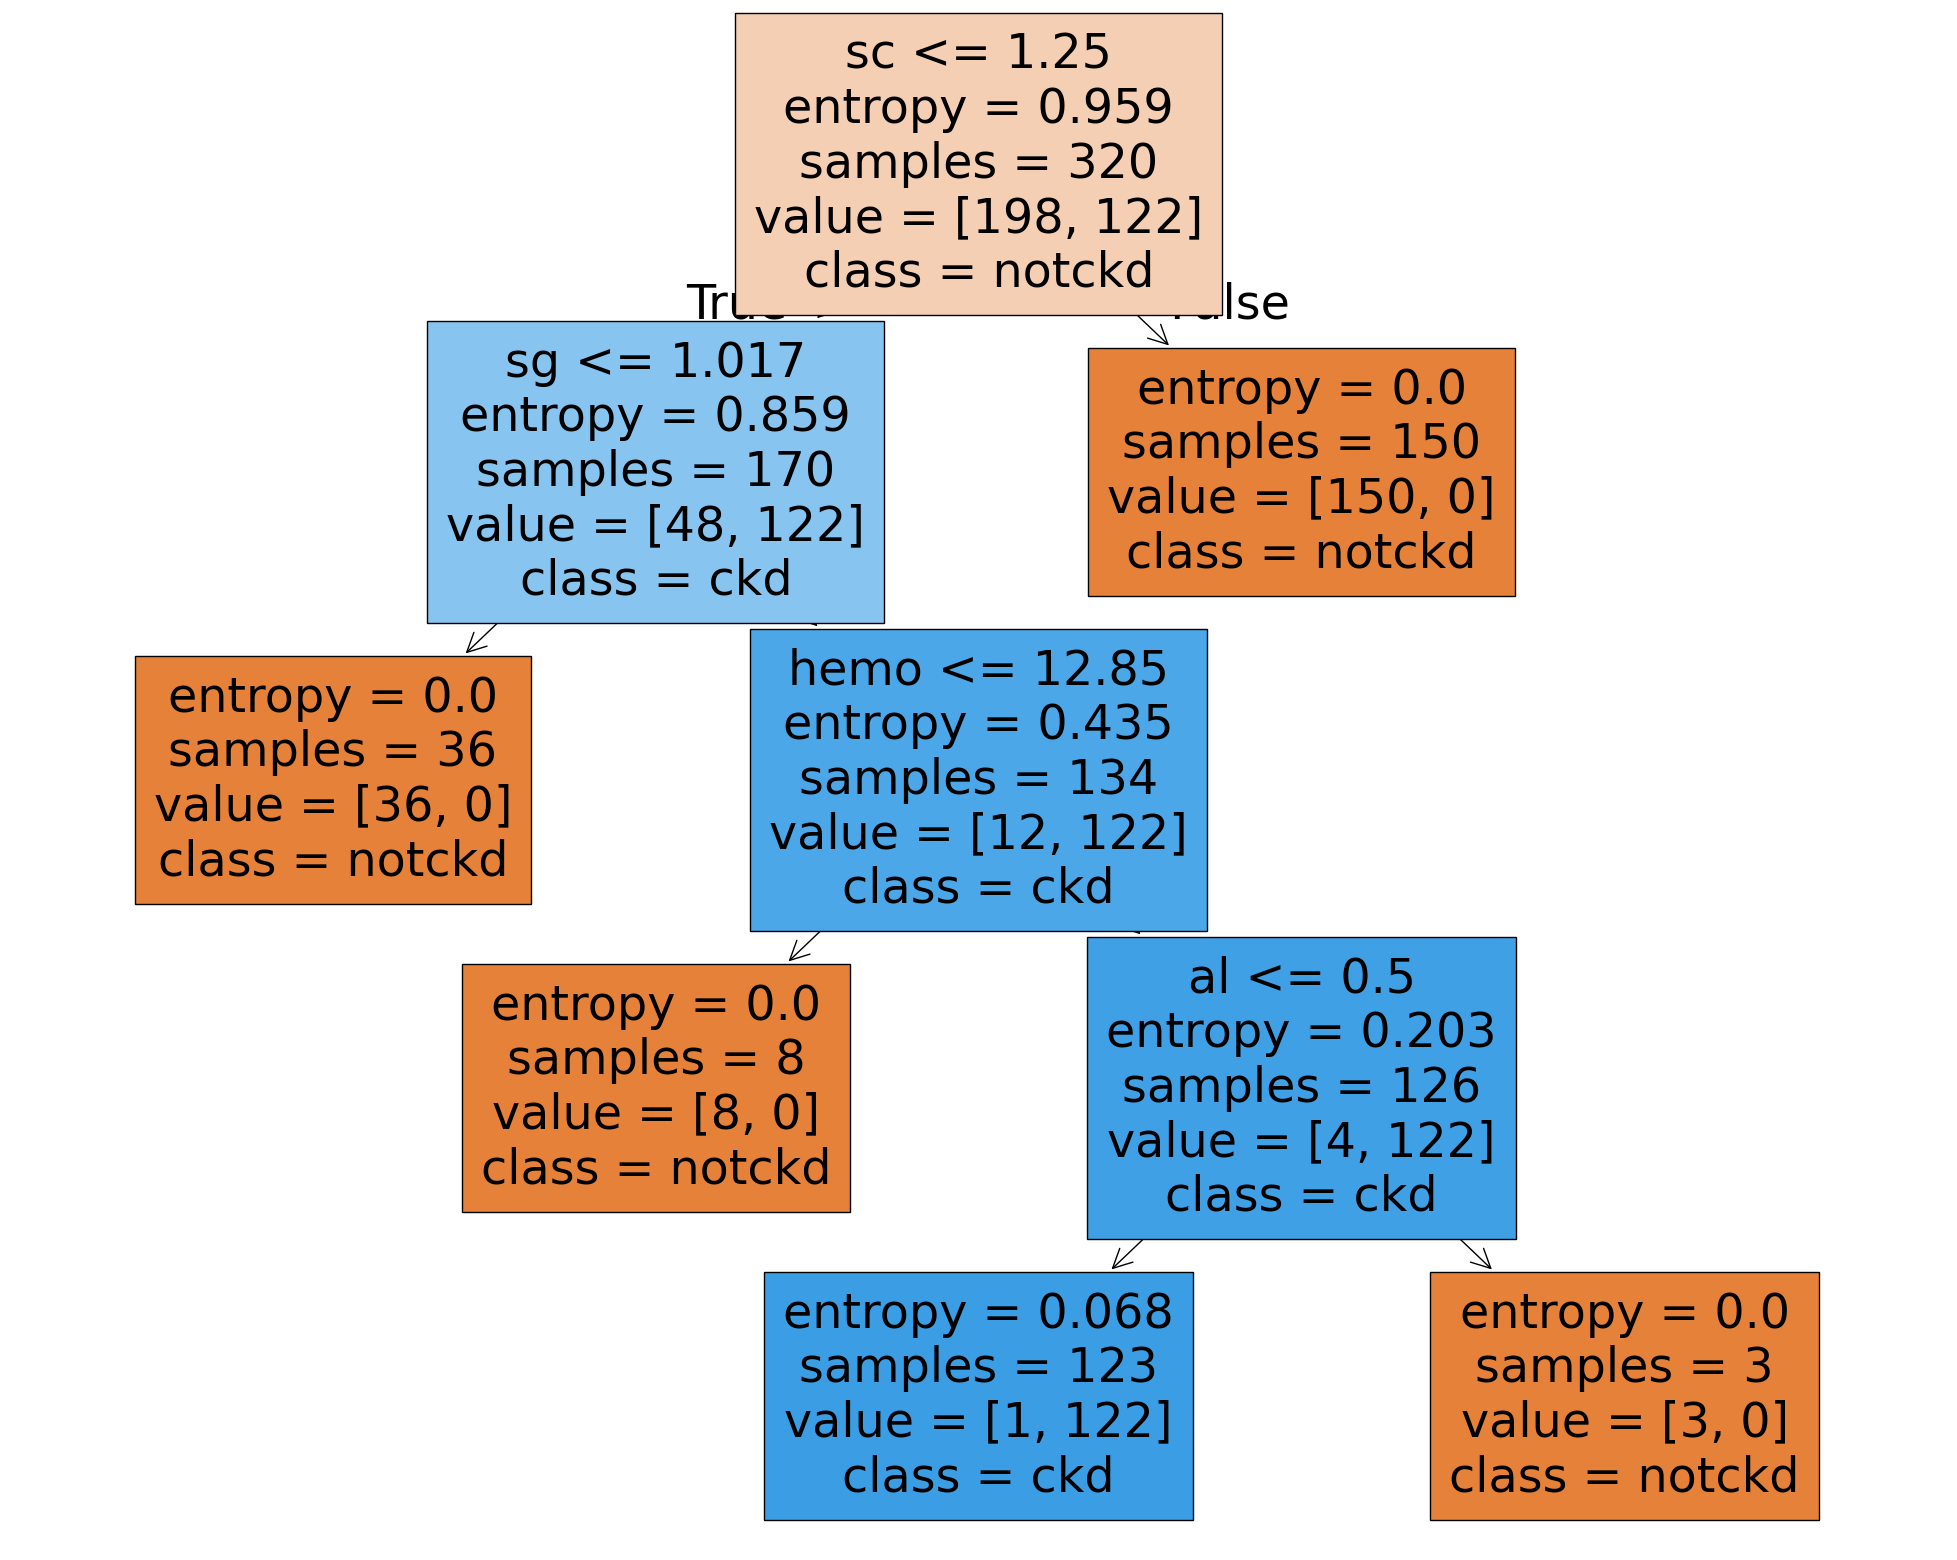

In [45]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(
    model, 
    feature_names= ind_col,
    class_names=['notckd', 'ckd'],
    filled= True
)